# IMPORTANDO AS BIBLIOTECAS

In [198]:
import datetime
import math
from os import path, listdir
from pathlib import Path
from inspect import stack

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# DEFININDO OPÇÕES GLOBAIS

In [199]:
pd.set_option('display.max_columns', None)

In [200]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [201]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# FUNÇÕES ÚTEIS

In [202]:
def get_files_directory(path_dir, specific_type=None):

    """

        FUNÇÃO PARA OBTER ARQUIVOS DE UM DIRETÓRIO.

        É POSSÍVEL ENVIAR UM FORMATO ESPECÍFICO PARA
        FILTRO DO FORMATO DE ARQUIVO DESEJADO.
        EX: OBTER APENAS XLSX

        # Arguments
            path_dir                   - Required : Diretório analisado (String)
            specific_type              - Optional : Lista com os formatos desejados (List)

        # Returns
            list_files                 - Required : Arquivos do diretório (List)

    """

    # INICIANDO A VARIÁVEL QUE ARMAZENARÁ TODOS OS ARQUIVOS DO DIRETÓRIO
    list_files = []

    # OBTENDO TODOS OS ARQUIVOS
    try:

        # VERIFICANDO SE É DIRETÓRIO
        if path.isdir(path_dir):

            # OBTENDO TODOS OS ARQUIVOS EXISTENTES NO ARQUIVO
            list_files = [path.join(path_dir, name) for name in listdir(path_dir)]

            # VERIFICANDO SE UMA EXTENSÃO ESPECÍFICA FOI DEFINIDA
            if specific_type:

                # VERIFICANDO SE A EXTENSÃO É DO TIPO TUPLE/LIST
                if not isinstance(specific_type, (tuple, list)):
                    specific_type = tuple(specific_type)

                # FILTRANDO OS VALORES DA LISTA
                list_files = [arq for arq in list_files if arq.lower().endswith((specific_type))]

        else:
            list_files = [path_dir]

    except Exception as ex:
        print("ERRO NA FUNÇÃO: {} - {}".format(stack()[0][3], ex))

    return list_files

# VARIÁVEIS GLOBAIS

In [203]:
# DIRETÓRIO ONDE ESTÃO OS DADOS
data_dir = 'data/DATASETS_GHCN_DAILY'

# FORMATO DESEJADO
specific_type = "csv"

In [204]:
# NOME DA COLUNA QUE SERÁ CRIADA PARA A INFORMAÇÃO DE LOCALIZAÇÕES
name_column_location = "name"

In [205]:
# DADOS DE ESTAÇÕES CLIMÁTICAS
dir_stations = 'data/DATASETS_GHCN_DAILY/data_station.csv'

In [206]:
# LISTA DE COLUNAS NÃO DESEJADAS NA BASE PRÉ MODELO
list_columns_to_drop = ['state', 'begin_station',	'end_station', 'avg_snow_depth']

# OBTENDO OS DADOS DO GHCN-MONTLY

> Global Historical Climatology Network - Monthly, Version 4
(NOAA GHCN v4)

In [207]:
# INICIANDO O DATAFRAME
df = pd.DataFrame()

# PERCORRENDO TODOS OS ARQUIVOS QUE ESTÃO NO DIRETÓRIO
for file in get_files_directory(data_dir,
                                specific_type=specific_type):

  if path.isfile(file):

    # REALIZANDO A LEITURA DO DATAFRAME AUXILIAR
    df_aux = pd.read_csv(file, sep=",")

    # ADICIONANDO O RESULTAOD DA LEITURA AO DATAFRAME GLOBAL
    df = pd.concat([df, df_aux], ignore_index=True, axis=0)

In [208]:
df.head()

,name,country,state,lat,lon,elev,begin_station,end_station,station,year,month,avg_temp,avg_min_temp,avg_max_temp,avg_prcp,avg_snow_depth
0,IGARAPE-ACU NORTH,BR,NaN,-1.067,-47.617,57.0,19450514.0,19450920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BOCAIUVA SOUTHEAST,BR,NaN,-17.200,-43.667,828.0,19470406.0,19470523.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OIAPOQUE,BR,NaN,3.814,-51.863,20.5,20160704.0,20190701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOA VISTA,BR,NaN,2.805,-60.647,95.5,20160704.0,20210120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TARTARUGALZINHO,BR,NaN,1.497,-50.917,22.5,20161021.0,20180405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
df["name"].value_counts()

VAL DE CANS INTL                 897
VIRACOPOS                        849
CAMPO GRANDE                     840
PAMPULHA CARLOS DRUMMOND DE A    790
COMANDANTE GUSTAVO KRAEMER       729
                                ... 
IRINEOPOLIS                        1
SAO FRANCISCO DO SUL               1
BELA VISTA DE GOIAS                1
IMARIBO                            1
BREVES                             1
Name: name, Length: 738, dtype: int64

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90330 entries, 0 to 90329
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            90330 non-null  object 
 1   country         941 non-null    object 
 2   state           0 non-null      float64
 3   lat             937 non-null    float64
 4   lon             937 non-null    float64
 5   elev            937 non-null    float64
 6   begin_station   941 non-null    float64
 7   end_station     941 non-null    float64
 8   station         89389 non-null  float64
 9   year            89389 non-null  float64
 10  month           89389 non-null  float64
 11  avg_temp        89389 non-null  float64
 12  avg_min_temp    89389 non-null  float64
 13  avg_max_temp    89389 non-null  float64
 14  avg_prcp        89389 non-null  float64
 15  avg_snow_depth  29 non-null     float64
dtypes: float64(14), object(2)
memory usage: 11.0+ MB


In [211]:
df.describe()

,state,lat,lon,elev,begin_station,end_station,station,year,month,avg_temp,avg_min_temp,avg_max_temp,avg_prcp,avg_snow_depth
count,0.0,937.000000,937.000000,937.000000,9.410000e+02,9.410000e+02,89389.000000,89389.000000,89389.000000,89389.000000,89389.000000,89389.000000,89389.000000,29.000000
mean,NaN,-15.457863,-47.819308,378.277695,1.992879e+07,2.015986e+07,839458.434147,2004.280281,6.524438,75.609339,80.932543,90.587577,10.400848,789.383485
std,NaN,8.473399,7.393010,362.592961,2.914832e+05,1.403735e+05,17385.535498,17.355799,3.427039,7.065953,255.362069,140.804616,18.425949,223.428202
min,NaN,-33.750000,-72.787000,-999.900000,1.931010e+07,1.931093e+07,749024.000000,1942.000000,1.000000,26.000000,16.828571,34.700000,0.000000,387.922581
25%,NaN,-22.333000,-52.233000,79.000000,1.974061e+07,2.020030e+07,825990.000000,1990.000000,4.000000,71.533333,63.020000,80.948387,0.000000,567.406667
50%,NaN,-15.900000,-47.617000,302.500000,2.010111e+07,2.021092e+07,836110.000000,2012.000000,7.000000,77.051613,68.990323,85.934483,0.090769,900.183333
75%,NaN,-8.283000,-42.317000,617.000000,2.016070e+07,2.021092e+07,839810.000000,2019.000000,9.000000,80.625806,73.445161,89.600000,13.349333,965.489655
max,NaN,3.867000,-29.317000,1811.500000,2.021082e+07,2.021092e+07,869980.000000,2023.000000,12.000000,101.600000,9999.900000,9999.900000,99.990000,967.722581


# OBTENDO OS DADOS DE ESTAÇÕES METEOLÓGICAS

In [212]:
# INICIANDO O DATAFRAME
df_station = pd.read_csv(dir_stations, sep=",")

In [213]:
df_station.head()

,name,country,state,lat,lon,elev,begin_station,end_station
0,IGARAPE-ACU NORTH,BR,NaN,-1.067,-47.617,57.0,19450514,19450920
1,BOCAIUVA SOUTHEAST,BR,NaN,-17.200,-43.667,828.0,19470406,19470523
2,OIAPOQUE,BR,NaN,3.814,-51.863,20.5,20160704,20190701
3,BOA VISTA,BR,NaN,2.805,-60.647,95.5,20160704,20210120
4,TARTARUGALZINHO,BR,NaN,1.497,-50.917,22.5,20161021,20180405


In [214]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           941 non-null    object 
 1   country        941 non-null    object 
 2   state          0 non-null      float64
 3   lat            937 non-null    float64
 4   lon            937 non-null    float64
 5   elev           937 non-null    float64
 6   begin_station  941 non-null    int64  
 7   end_station    941 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 58.9+ KB


In [215]:
df_station.describe()

,state,lat,lon,elev,begin_station,end_station
count,0.0,937.000000,937.000000,937.000000,9.410000e+02,9.410000e+02
mean,NaN,-15.457863,-47.819308,378.277695,1.992879e+07,2.015986e+07
std,NaN,8.473399,7.393010,362.592961,2.914832e+05,1.403735e+05
min,NaN,-33.750000,-72.787000,-999.900000,1.931010e+07,1.931093e+07
25%,NaN,-22.333000,-52.233000,79.000000,1.974061e+07,2.020030e+07
50%,NaN,-15.900000,-47.617000,302.500000,2.010111e+07,2.021092e+07
75%,NaN,-8.283000,-42.317000,617.000000,2.016070e+07,2.021092e+07
max,NaN,3.867000,-29.317000,1811.500000,2.021082e+07,2.021092e+07


# PRÉPROCESSAMENTO

## OBTENDO A COLUNA DE ANO DA ESTAÇÃO METEOLÓGICA

In [216]:
for column_name in ["begin_station", "end_station"]:

  print("APLICANDO A OBTENÇÃO DO ANO PARA A COLUNA: {}".format(column_name))

  df_station["{}_{}".format(column_name, "year")] = df_station[column_name].apply(lambda x: datetime.datetime.strptime(str(x), "%Y%m%d").year)

APLICANDO A OBTENÇÃO DO ANO PARA A COLUNA: begin_station
APLICANDO A OBTENÇÃO DO ANO PARA A COLUNA: end_station


## ORDENANDO O DATASET PELA ORDEM DAS ESTAÇÕES DO ANO

In [217]:
df_station = df_station.sort_values(by=["name", "begin_station", "end_station"], ascending=True)

## REALIZANDO O JOIN DOS DADOS

Como precisamos obter a localização meterológica com cruzamento por estação e ano, realizamos usar uma função

In [218]:
def get_station_location(df, df_station,
                         column_lat="LAT",
                         column_long="LONG",
                         column_elev="ELEV"):

  print("INICIANDO PROCESSO DE OBTENÇÃO DAS LOCALIZAÇÕES")

  # CRIANDO AS COLUNAS DESEJADAS
  for column in [column_lat, column_long, column_elev]:
    # VERIFICANDO SE A COLUNA JÁ EXISTE
    if column not in df.columns:
      # CASO NÃO EXISTA, CRIA COM VALORES VÁZIOS
      df[column] = ""

  # PERCORRENDO O DATAFRAME
  for idx, row in df.iterrows():

    # FILTANDO ESTAÇÃO METEOLÓGICA ATUAL
    station = row[name_column_location]

    # OBTENDO O ANOATUAL
    year = row["year"]

    try:
      df_filter = df_station[(df_station["name"] == station) & ((df_station["begin_station_year"] >= year) | (df_station["end_station_year"] <= year))]

      # VERIFICANDO SE ALGUM DADO FOI OBTIDO
      if df_filter.empty:
          # FILTRA SOMENTE PELO NOME
          df_filter = df_station[(df_station["name"] == station)]

      if not df_filter.empty:
        # OBTENDO LATITUDE, LONGITUDE E ELEVAÇÃO DA ESTAÇÃO METEOLÓGICA
        lat, lon, elev = df_filter.iloc[0][["lat", "lon", "elev"]]

        # ATUALIZANDO OS VALORES NO DATAFRAME ORIGINAL
        df.at[idx, column_lat] = lat
        df.at[idx, column_long] = lon
        df.at[idx, column_elev] = elev
    except Exception as ex:
        print(ex)

  print("PROCESSO CONCLUIDO COM SUCESSO")

  return df

In [219]:
df_join = get_station_location(df=df,
                               df_station=df_station,
                               column_lat="lat",
                               column_long="lon",
                               column_elev="elev")

INICIANDO PROCESSO DE OBTENÇÃO DAS LOCALIZAÇÕES
PROCESSO CONCLUIDO COM SUCESSO


## NORMALIZANDO COLUNA COUNTRY

In [220]:
df_join["country"] = "BR"

## REMOVENDO COLUNAS NÃO DESEJADAS

In [221]:
# REALIZANDO UMA CÓPIA DO DATAFRAME ORIGINAL
df_original = df_join.copy()

In [222]:
# DELETANDO AS COLUNAS NÃO MAIS DESEJADAS
df_join = df_join.drop(list_columns_to_drop, axis=1, errors='ignore')

## ANALISANDO A DISTRIBUIÇÃO DOS DADOS

In [223]:
# Criando o histograma
fig = px.histogram(data_frame=df_join, x='month', color_discrete_sequence=['skyblue'],
                   category_orders={'month': [value for value in sorted(df_join["month"].unique()) if not math.isnan(value)]})

# Atualizando os rótulos do eixo x e y
fig.update_xaxes(title='Mês')
fig.update_yaxes(title='Quantidade')

# Ajustando o espaço entre as barras
fig.update_layout(barmode='overlay', bargap=0.2)

# Atualizando o título do gráfico
fig.update_layout(title='Contagem de valores por mês')

# Exibindo o gráfico
fig.show()

## ANALISANDO MISSING VALUES

In [224]:
len(df_join)

90330

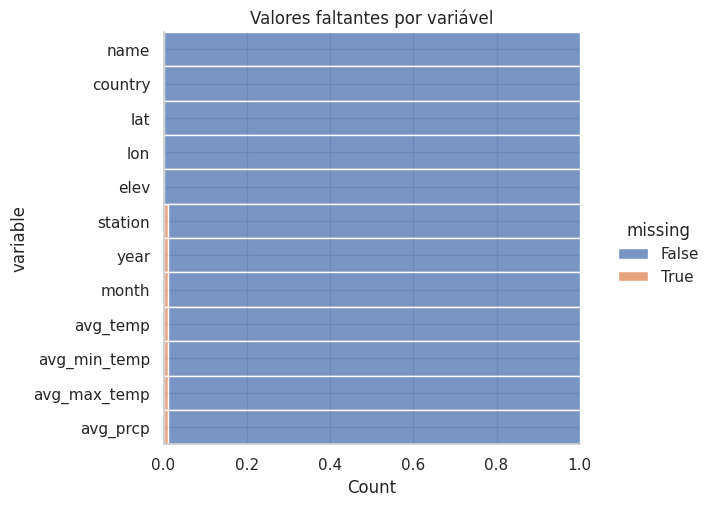

In [225]:
sns.set_style("whitegrid")

p = sns.displot(
    data=df_join.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

p.fig.set_dpi(100)

plt.title('Valores faltantes por variável')
plt.show()
p.savefig("plot_ghcn_daily_missing_values_i.png")

In [226]:
round(100*df_join.isna().sum()/len(df_join), 2)

name            0.00
country         0.00
lat             0.00
lon             0.00
elev            0.00
station         1.04
year            1.04
month           1.04
avg_temp        1.04
avg_min_temp    1.04
avg_max_temp    1.04
avg_prcp        1.04
dtype: float64

## REMOVENDO LINHAS SEM ANO OU MESES PREENCHIDOS

In [227]:
df_join = df_join.dropna(subset=["year", "month"])

# ANÁLISE EXPLORATÓRIA

Para possuir a maior quantidade de entradas, o foco será na análise com frequência de dados por meses do ano. Portanto removeremos as colunas que contém as médias trimestrais.

In [228]:
df_join.sample(50)

,name,country,lat,lon,elev,station,year,month,avg_temp,avg_min_temp,avg_max_temp,avg_prcp
66146,PIRIPIRI,BR,-4.267,-41.783,161.0,817940.0,2018.0,12.0,83.277419,74.935484,95.309677,0.000000
47928,CRICIUM/FORQUILHINHA,BR,-28.733,-49.417,28.3,836727.0,2013.0,5.0,64.200000,53.716129,73.922581,19.352903
88989,GOIABEIRAS,BR,-20.258,-40.286,3.4,836490.0,2023.0,7.0,71.125806,64.661290,78.880645,38.705806
4929,SAO PEDRO DA ALDEIA,BR,-22.813,-42.093,18.6,837590.0,1974.0,1.0,84.428571,78.542857,88.057143,28.568571
87221,SAO RAIMUNDO NONATO,BR,-9.033,-42.700,403.5,819890.0,2023.0,1.0,78.706452,71.316129,87.619355,0.000000
80029,PORTO ESTRELA,BR,-15.325,-57.226,146.5,867040.0,2021.0,7.0,71.119355,55.364516,91.290323,0.000000
41133,SANTO ANGELO,BR,-28.282,-54.169,321.9,820306.0,2008.0,11.0,68.940000,61.880000,77.360000,0.000000
22014,CAMPO GRANDE,BR,-20.450,-54.617,531.5,836120.0,1988.0,2.0,76.641379,70.041379,86.841379,0.127241
42808,ITAITUBA,BR,-4.250,-56.000,34.0,824440.0,2010.0,12.0,81.845161,74.561290,89.948387,58.058710
48038,MARECHAL RONDON,BR,-15.653,-56.117,188.1,833620.0,2013.0,9.0,81.780000,70.706667,94.280000,9.999000


In [229]:
# QUANTIDADE DE ESTADOS DISTINTOS
count_state = df_join[name_column_location].nunique()
count_state

652

## ANALISANDO VALORES FALTANTES

## VISÃO DATASET GERAL

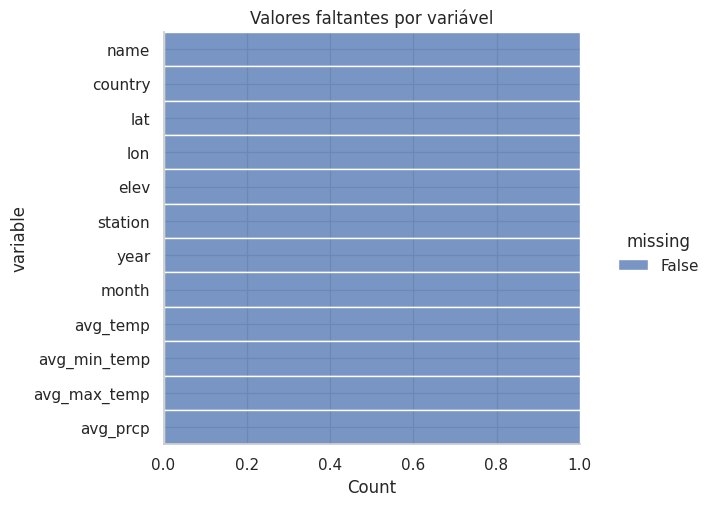

In [230]:
sns.set_style("whitegrid")

p = sns.displot(
    data=df_join.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

p.fig.set_dpi(100)

plt.title('Valores faltantes por variável')
plt.show()
p.savefig("plot_ghcn_montly_missing_values_ii.png")